# CNN

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import DataLoader

In [ ]:
# Load data

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize( (0.5,0.5,0.5), (0.5,0.5,0.5))]
)

# set the train
trainset = torchvision.datasets.CIFAR10(root = './data(my directory)', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root  = './data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=8, shuffle=True, num_workers=2)

# what i want to classify
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

100%|██████████| 170498071/170498071 [00:02<00:00, 84949748.08it/s]


Extracting ./data(my directory)/cifar-10-python.tar.gz to ./data(my directory)


100%|██████████| 170498071/170498071 [00:02<00:00, 79641043.38it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data(my directory)
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [ ]:
trainloader

## Build a Model

i개의 layer를 가진 convnet을 생성한 후, forward에서 i번에 따른 연산을 진행시킴

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module) :  # 모듈을 상속받음
  def __init__(self) :
    super(Net, self).__init__()   #Net 상속

    self.conv1 = nn.Conv2d(3,6,5)   #3x6의 5개 채널
    self.pool1 = nn.MaxPool2d(2,2)

    self.conv2 = nn.Conv2d(6,16,5)
    self.pool2 = nn.MaxPool2d(2,2)

    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)   # 최종적으로는 output 10개

  def forward(self,x) :
    # 연산의 순서

    x = self.pool1(F.relu(self.conv1(x)))

    x = self.pool2(F.relu(self.conv2(x)))

    x=x.view(-1,16*5*5)   #Fully Connect를 위해 이미지를 1D로 변경

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x


net = Net()   #class에 대한 instance

In [ ]:
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## Implement the model with training data

In [ ]:
# optimizer

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum = 0.9)
#SGD : StochasticGradient
#net.parameters : net의 parameter 반환


현재 데이터로더에 8개의 배치가 존재하기 때문에 학습은 8개로 진행

In [ ]:
for epoch in range(1) :
  running_loss = 0.0
  max_loss = []

  for i,data in enumerate(trainloader,0) :    #data는 텐서로 이루어져 있음
    inputs, labels = data
    print('*'*100)
    print('i : ', i)
    print('*'*100)
    print('inputs : ', inputs)
    print('*'*100)
    print('data :', data)

    #optimizer 리셋
    optimizer.zero_grad()

    #forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)

    # loss function
    loss.backward()
    optimizer.step()

    #print statistics
    running_loss += loss.item()
    max_loss.append(loss.item())

    #loss의 값을 하나의 숫자로 변환 후 update

    if i % 2000 == 1999 :
      print('[%d, %5d] loss : %.3f' % (epoch +1, i+1, running_loss / 2000))
      running_loss = 0.0

    # earlystopping을 적용하고 싶으면
    # if i>2 :
    #   if max_loss[i] > max_loss[i-1] :
    #     break


    print('Finished')
    print('max loss is : {}'.format(max_loss[i-1]))




스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
         [[-0.4431, -0.4431, -0.4275,  ..., -0.2392, -0.3961, -0.5294],
          [-0.4196, -0.4431, -0.4431,  ..., -0.4275, -0.5216, -0.5608],
          [-0.3882, -0.4588, -0.4824,  ..., -0.5373, -0.5608, -0.5765],
          ...,
          [-0.6392, -0.6627, -0.6706,  ...,  0.0667,  0.3569,  0.5216],
          [-0.7804, -0.8039, -0.8353,  ...,  0.0902,  0.3804,  0.5373],
          [-0.9373, -0.9451, -0.9451,  ..., -0.1686,  0.2627,  0.4588]],

         [[-0.3412, -0.3725, -0.3882,  ..., -0.1922, -0.3725, -0.5137],
          [-0.3176, -0.3647, -0.3961,  ..., -0.3725, -0.4902, -0.5451],
          [-0.3020, -0.3804, -0.4196,  ..., -0.4902, -0.5294, -0.5529],
          ...,
          [-0.6000, -0.6235, -0.6314,  ...,  0.1216,  0.4431,  0.6000],
          [-0.7412, -0.7647, -0.7961,  ...,  0.1294,  0.4431,  0.5922],
          [-0.8980, -0.9059, -0.9059,  ..., -0.1686,  0.2784,  0.4902]]],


        [[[ 1.0000,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0

KeyboardInterrupt: ignored

In [ ]:
# save the model
path = './cifar_net.pth'
torch.save(net.state_dict(),path)

In [ ]:
# load the model
net = Net()
net.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
# test를 통해 결과 확인

correct = 0
total = 0

with torch.no_grad() :
  for data in testloader :
    images, labels = data
    outpus = net(images)    # 결과는 image로 반환
    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)

    correct += (predicted == labels).sum().item()


  print('acc of the network of the 10000 test images : %d %%' % (100*correct / total))



acc of the network of the 10000 test images : 10 %


# vgg 16

https://www.kaggle.com/code/blurredmachine/vggnet-16-architecture-a-complete-guide

http://ethereon.github.io/netscope/#/gist/dc5003de6943ea5a6b8b

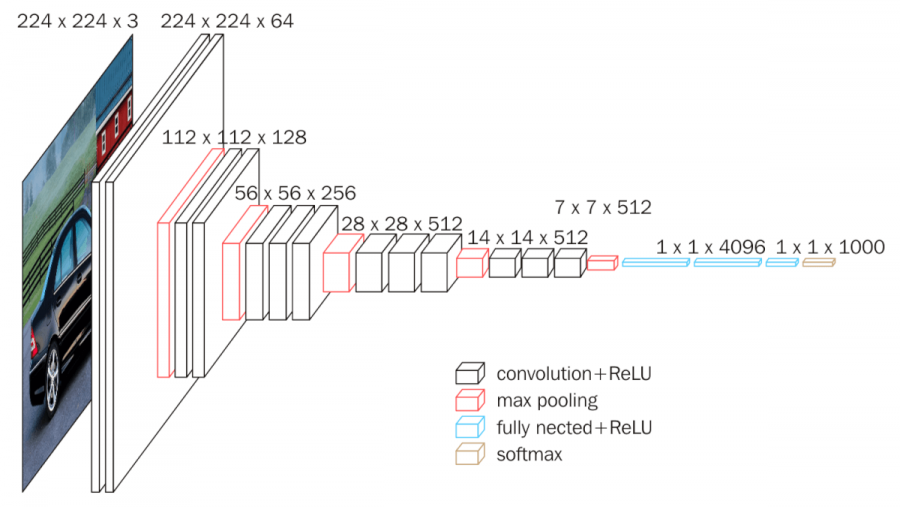

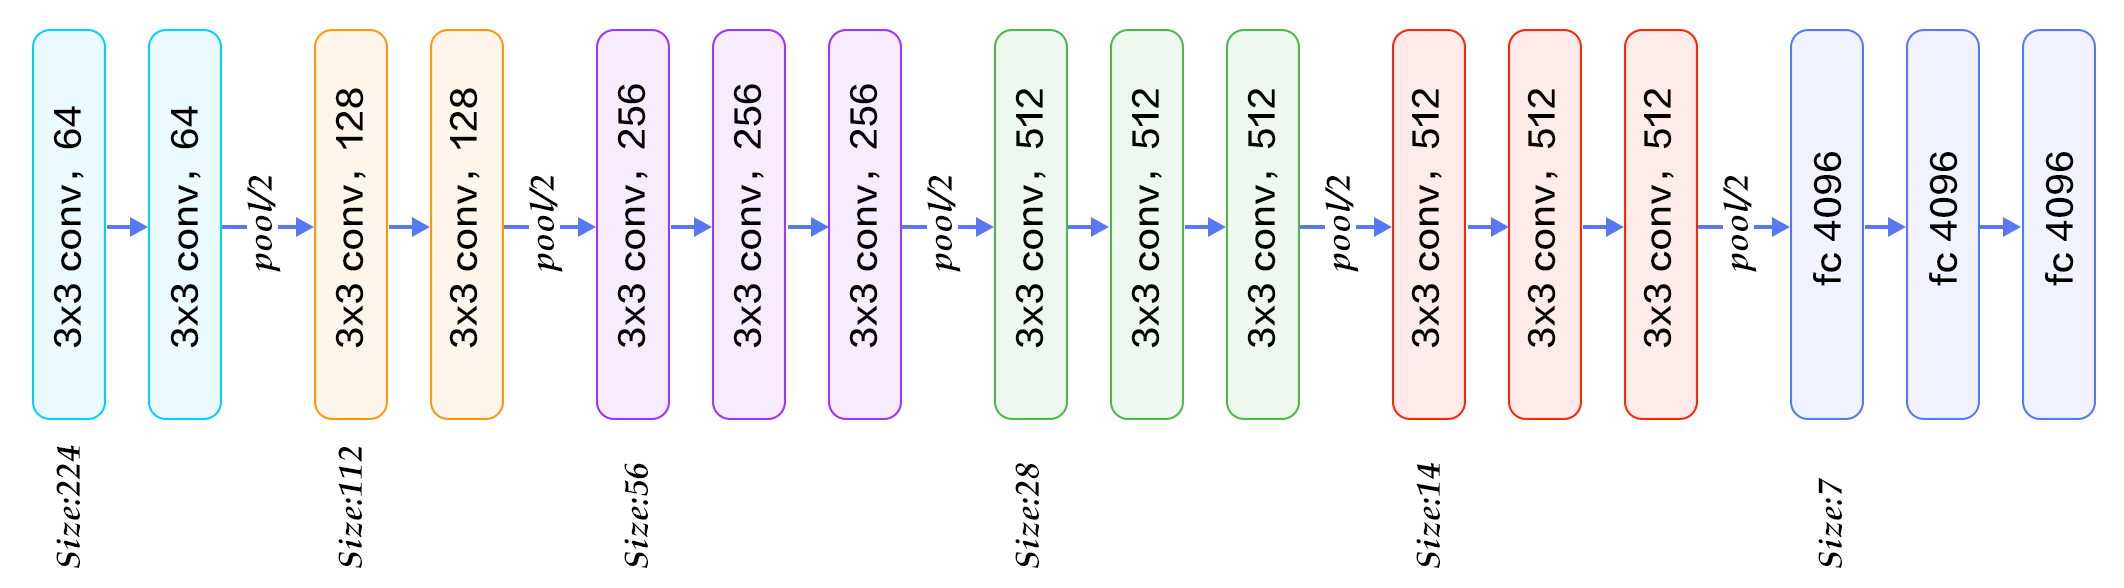

In [ ]:
# importing libraries

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [ ]:
# Defining input img shape

_input = Input((224,224,1))

In [ ]:
# building a VGG-16 Model

conv1 = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(_input)
conv2 = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(conv1)

pool1 = MaxPooling2D((2,2))(conv2)

conv3 = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(pool1)
conv4 = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(conv3)

pool2 = MaxPooling2D((2,2))(conv4)

conv5 = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')(pool2)
conv6 = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')(conv5)
conv7 = Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu')(conv6)

pool3 = MaxPooling2D((2,2))(conv7)

conv8 = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(pool3)
conv9 = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(conv9)

pool4 = MaxPooling2D((2,2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu')(conv12)

pool5 = MaxPooling2D((2,2))(conv13)

flat = Faltten()(pool5)

dense1 = Dense(4096 ,activation = 'relu')(flat)
dense2 = Dense(4096 ,activation = 'relu')(dense1)
output = Dense(1000 ,activation = 'softmax')(dense2)

vgg16_model = Model(inputs = _input, outputs=output)

## Pretrained model

In [ ]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

import matplotlib.pyplot as plt

from PIL import Image

import seaborn as sns

import pandas as pd
import numpy as np
import os

img1 = "../input/flowers-recognition/flowers/tulip/10094729603_eeca3f2cb6.jpg"
img2 = "../input/flowers-recognition/flowers/dandelion/10477378514_9ffbcec4cf_m.jpg"
img3 = "../input/flowers-recognition/flowers/sunflower/10386540696_0a95ee53a8_n.jpg"
img4 = "../input/flowers-recognition/flowers/rose/10090824183_d02c613f10_m.jpg"
imgs = [img1, img2, img3, img4]

In [ ]:
def _load_image(img_path) :
  img = image.load_img(img_path, target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = preprocess_input(img)
  return img

def _get_predictions(_model) :
  f,ax = plt.subplots(1,4)
  f.set_size_inches(80,40)

  for i in range(4) :
    ax[i].imshow(Image.open(imgs[i]).resize((200,200), Image.ANTIALIAS))
    plt.show()

  f, axes = plt.subplots(1,4)
  f.set_size_inches(80,20)

  for i,img_path in enumerate(imgs) :
    img = _load_image(img_path)
    preds = decode_predictions(_model.predict(img), top=3)[0]
    b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color = 'gray', ax=axes[i])
    b.tick_params(labelsize=55)
    f.tight_layout()

Using pretrained weights to save some time.

In [ ]:
from keras.applications.vgg16 import VGG16
vgg16_weights = '../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5'

vgg16_model = VGG16(weight=vgg16_weights)
_get_predictions(vgg16_model)

# LeNet-5

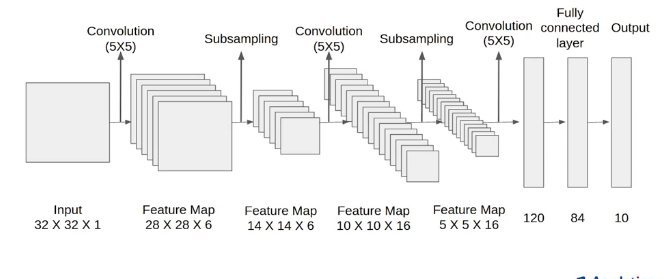

- conv1 : 5x5, kernel=6, stride=1
- Sub1 : 2x2, kernel=6, stride=2
- conv2 : 5x5, kernel=16, stride=6
- Sub2 : 2x2, kernel=16, stride=2
- conv3 : 5x5, kernel=120, stride=1

- fc1 : tanh, input = 120, output = 84
- fc2 : RBF, input = 84, output = 10




## Modeling with pytorch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# direc = '/content/drive/MyDrive/~~'

In [ ]:
from datetime import datetime

import numpy as np

import torch
import torch.nn as nn
import torch.functional as F
from torch.utils.data import DataLoader

from torchvision import datasets, transforms
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'


Setting Parameters

In [ ]:
random_seed = 42
learning_rate = 0.001
batch_size = 32
n_epochs = 15

# Lenet의 이미지 인풋 파일은 32*32
img_size = 32

# 최종 판별 이미지는 10
n_classes = 10

function with acc & visualize loss

- .eval() : train과 eval에서 수행하는 다른 작업을 수행 할 수 있도록 switching
- _: 인터프리터, 값무시, 네이밍 등등

In [ ]:
def get_acc(model, data_loader, device) :
  """
  전체 data_loader에 대한 예측의 정확도
  """

  correct_pred = 0
  n = 0

  with torch.no_grad() :
    model.eval()

    for X,y_true in data_loader :

      X = X.to(device)
      y_true = y_true.to(device)

      _, y_prob = model(X)
      _, predicted_labels = torch.max(y_prob,1)

      n += y_true.size(0)
      correct_pred += (predicted_labels == y_true).sum()

    return correct_pred.float() / n

def plot_losses(train_losses, valid_losses) :
  """
  training과 validation loss 시각화
  """

  plt.style.use('seaborn')

  train_loss = np.array(train_losses)
  valid_loss = np.array(valid_losses)

  fig, ax = plt.subplots(figsize=(15,15))

  ax.plot(train_losses, color = 'blue', label = 'training loss')
  ax.plot(valid_losses, color = 'red', label = 'validation loss')

  ax.set(
      title = 'Loss and epochs',
      xlabel = 'Epoch',
      ylabel = 'Losses'
  )
  ax.legend()
  fig.show()

  plt.style.use('default')


Training data에 사용되는 helper함수 정의



In [ ]:
def train(train_loader, model, criterion, optimizer, device) :
  """
  Training loop의 단계에 대한 함수
  """

  model.train()
  running_loss = 0

  for X,y_true in train_loader :
    optimizer.zero_grad()   # gradient reset

    X=X.to(device)
    y_true = y_true.to(device)

    # 순전파
    y_hat, _ = model(X)
    loss = criterion(y_hat, y_true)

    running_loss += loss.item() * X.size(0)

    # 역전파
    loss.backward()
    optimizer.step()


  epoch_loss = running_loss / len(train_loader.dataset)

  return model, epoch_loss, optimizer


Validation data의 함수

In [ ]:
def Validation(valid_loader, model, criterion, device) :

  model.eval()
  running_loss = 0

  for X,y_true in valid_loader :

    X = X.to(device)
    y_true = y_true.to(device)

    # 순전파만
    y_hat, _ = model(X)

    loss = criterion(y_hat, y_true)
    running_loss += loss.item() * X.size(0)

  epoch_loss = running_loss / len(valid_loader.dataset)

  return model, epoch_loss

Training Loop

In [ ]:
def Training_Loop(model, criterion, optimizer, train_loader, valid_loader, epochs,
                  device, print_every = 1) :
    """
    전체 training loop
    """

    # metrics 저장 객체
    best_loss = 1e10
    train_losses = []
    valid_losses = []

    # train model
    for epoch in range(0,epochs) :

      # training
      model, optimizer, train_loss = train(train_loader, model, criterion, optimizer, device)
      train_losses.append(train_loss)

      # validation
      with torch.no_grad() :
        model, valid_loss = Validation(valid_loader, model, criterion, device)
        valid_losses.append(valid_loss)

      if epoch % print_every == (print_every -1) :

        train_acc = get_acc(model, train_loader, device)
        valid_acc = get_acc(model, valid_loader, device)

        print(f"{datetime.now().time().replace(microsecond=0)} ---"
        f'Epoch : {epoch}\t'
        f'Train loss : {train_loss : .4f}\t'
        f'Valid loss : {valid_loss : .4f}\t'
        f'Train Acc : {100 * train_acc : .2f}\t'
        f'Valid Acc : {100 * valid_acc : .2f}')

    plot_losses(train_loss, valid_loss)

    return model, optimizer, (train_loss, valid_loss)


Prepare Dataset

In [ ]:
# transform

transforms = transforms.Compose([transforms.Resize((32,32)), transforms.ToTensoe()])

# dataset 다운 및 생성
train_dataset = datasets.MNIST(root = 'mnist_data', train=True, transform=transforms, download=True)
valid_dataset = datasets.MNIST(root = 'mnist_data', train=False, transform=transforms)

# data loader 정의
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
vali_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# 불러온 MNIST
row_img = 10
n_rows = 5

fig = plt.figure()
for idx in range(1, row_img * n_rows +1) :
  plt.subplot(n_rows, row_img, idx)
  plt.axis('off')
  plt.imshow(train_dataset.data[idx], cmap = 'gray_r')

fig.suptitle('MNIST Dataset - preview')

LeNet-5 structure

In [ ]:
class LeNet5(nn.Module) :

  def __init__(self, n_classes) :
    super(LeNet5, self).__init__()

    # convert

    self.feature_extractor = nn.Sequential(
        nn.Conv2d(in_channels = 1, out_channels=6, kernel_size=5, stride=1),
        nn.Tanh(),
        nn.AvgPool2D(kernel_size=2),

        nn.Conv2D(in_channels=6, out_channels=16, kernel_size=5, stride=1),
        nn.Tanh(),
        nn.AvgPool2D(in_channels=16, out_channels=120, kernel_size=5, stride=1),
        nn.TanH()
    )

    self.classifier = nn.Sequential(
        nn.Linear(in_features=120, out_features=84),
        nn.Tanh(),

        nn.Linear(in_features=84, out_features=n_classes)
    )

  def forward(self,x) :
    x = self.feature_extractor(x)
    x=torch.flatten(x,1)

    logits = self.classifier(x)

    probs = F.softmax(logits, dim=1)
    return logits, probs

model, optimizer, loss function

In [ ]:
torch.manual_seed(random_seed)

model = LeNet5(n_classes).to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()

In [ ]:
model, optimizer, _ = Training_Loop(model, criterion, optimizer, train_loader, valid_loader, n_epochs, device)

#  RNN

https://justkode.kr/deep-learning/pytorch-rnn/

## Parameters

- input_sizse : input
- hidden_size : size of hidden-layer
- num_layers : num_layers
- nonlinearity : select non-linear activation function
- bias : bias
- dropout : dropout
- batch_first : True - set sieze of output to (batch,seq,feature).
- bidirectional : True - bidirectional RNN


if num_layers set 2 :

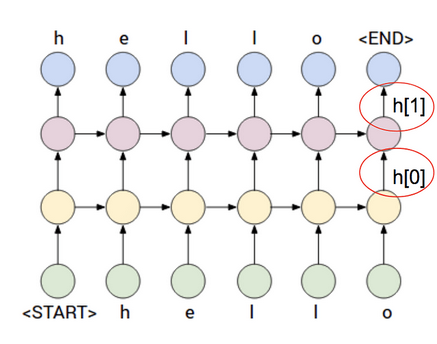

inputs : (input, h_0)

- input : (seq_len, batch, input_size)
- h_0 : (num_layers * num_directions, batch, hidden_size)


Outputs : (output, h_n)

- output : (seq_len, num_directions * hidden_size)
- h_n : (num_layers * num_directions, batch, hiddden_size)


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

sentences = ["i like dog", "i love coffee", "i hate milk", "you like cat", "you love milk", "you hate coffee"]
dtype = torch.float



In [ ]:
# word processing

word_list = list(set(' '.join(sentences).split()))
word_dict = {w : i for i,w in enumerate(word_list)}

number_dict = {i : w for i,w in enumerate(word_list)}

n_classes = len(word_dict)

In [ ]:
# textRNN parameter

batch_size = len(sentences)
n_step = 2
n_hidden = 5

def make_batch(sentece) :
  input_batch = []
  target_batch = []

  for sen in sentences :
    word = sen.split()
    input = [word_dict[n] for n in word[:-1]]
    target = word_dict[word[-1]]

    input_batch.append(np.eye(n_class)[input])    # one hot encoding
    target_batch.append(target)

  return input_batch, target_batch


input_batch, target_batch = make_batch(sentences)
input_batch = torch.tensor(input_batch, dtype = torch.float32, requires_grad = True)
target_batch = torch.tensor(target_batch, dtype = torch.int64)

In [ ]:
# text RNN

class TextRNN(nn.Module()) :
  def __init__(self) :
    super(TextRNN, self).__init__()

    self.rnn = nn.RNN(input_size = n_classes, hidden_size = n_hidden, dropout=0.1)
    self.W = nn.Parameter(torch.randn([n_hidden, n_class]).type(dtype))
    self.b = nn.Parameter(torch.randn([n_class]).type(dtype))
    self.softmax = nn.Sofrmax(dim=1)

  def forward(self, hidden, x) :
    x = x.transpose(0,1)
    outputs, hidden = self.rnn(x, hidden)
    outputs = outputs[-1]

    model = torch.mm(outputs, self.W) + self.b
    return model



In [ ]:
# Training

model = TextRNN()

criterion = nn.CrossEntropyLoss()
optimizer = nn.Adam(model.parameters(), lr=0.01)

for epoch in range(500) :
  hidden = torch.zeros(1, batch_size, n_hidden, requires_grad=True)
  outputs = model(hidden, input_batch)
  loss = criterion(output, target_batch)

  if (epoch +1) % 100 == 0 :
    print('Epoch : ', '%04d' % (epoch +1), 'cost = ', '{:.6f}'.format(loss))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


input = [sen.split()[:2] for sen in sentences]

hidden = torch.zeros(1, batch_size, n_hidden, requires_grad = True)
predict = model(hidden, input_batch).data.max(1, keepdim=True)[1]

print([sen.split()[:2] for sen in sentences], '->', [number_dict[n.item()] for n in predict.squeeze()])

# AlexNet

https://github.com/dansuh17/alexnet-pytorch/blob/master/model.py#L26

https://dl.acm.org/doi/pdf/10.1145/3065386

## data
- 256*256
  - resize : 이미지의 짧은 부분을 256으로 고정, 중앙 부분을 256*256으로 crop

- 각 이미지의 pixel의 training set의 평균을 빼서 normalize

## Architecture

[Input layer- Conv1 - MaxPool1 - Norm1 - Conv2 - MaxPool2 - Norm2 - Conv3 - Conv4 - Conv5 - Maxpool3 - FC1 - FC2 -Output layer]

1. ReLU Normalinearity

2. Training on multiple GPUs

3. Local Response Normalization

4. Overlapping Pooling

Reducing Overfitting

1. Data Augmentation
2. Dropout(0.5)
  - 두 개의 FC에서만 진행

Learning

1. Hyperparameter : SGD
  - momentum = 0.9
  - batch_Size = 128
  - weight_decay = 0.005

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch.utils import data

import torchvision.datasets import datasets
import torchvision.transforms import transforms

from tensorboardX import SummaryWriter

In [ ]:
device = torch.device('cuda' if torch.cuda_is_available() else 'cpu')

In [ ]:
# parameters
num_epochs = 90
batch_size = 128
momentum = 0.9
lr_decay = 0.0005
lr_init = 0.01
image_dim = 227 # pixels
num_classes = 1000
device_ids = [0,1,2,3]




In [ ]:
# set directory

input_root_dir = 'alexnet_data_in'
training_img_dir = 'alexnet_data_in/imagenet'

output_dir = 'alexnet_data_out'
log_dir = output_dir + '/tblogs'    # tensorboard logs
checkpoint_dir = output_dir + '/models'   # model checkpoints

# checkpoint 경로의 dir 만들기
os.makedirs(checkpoint_dir, exist_ok = True)

In [ ]:
class Alexnet(nn.Module) :
  def __init__(self, num_classes = 1000) :
    super().__init__()

    # input sizes = 227x227x3

    self.net = nn.Sequential(
        nn.Conv2D(in_chaanel=3, out_channel=96, kernel_size =11, stride=4),
        nn.ReLU(),
        nn.LocalResponseNorm(size=5, alpha=0.001, beta=0.75, k=2),
        nn.MaxPool2D(kernel=3, stride=2),

        nn.Conv2D(96,256,5,padding=2),    # (256x13x13)
        nn.ReLU(),
        nn.LocalResponseNorm(size=5, alpha=0.001, beta = 0.75, k=2),
        nn.MaxPool2D(kernel_size=3, stride=2),
        nn.ReLU(),

        nn.Conv2D(256,384,3, padding=1)
        nn.ReLU(),
        nn.Conv2D(384,384,3, padding= 1),
        nn.ReLU(),
        nn.Conv2D(384,256,3, padding = 1),
        nn.ReLU(),
        nn.MaxPool2D(kernel_size=3, stride=2)

    )
  # name for linear layers
  self.classifier = nn.Sequential(
      nn.Dropout(p=0.5, inplace=True),
      nn.Linear(in_features =(256*6*6), out_features = 4096),
      nn.ReLU(),
      nn.Dropout(p=0.5, inplace=True),
      nn.Linear(in_features=4096, out_features = 4096),
      nn.ReLU(),
      nn.Linear(in_features=4096, out_features = num_classes)

  )
  self.init_bias()


def init_bias(self) :
  for layer in self.net :
    if isinstance(layer, nn.Conv2D) :
      nn.init_normal_(layer.weight, mean=0, std=0.01)
      nn.init_constant_(layer.bias, 0)


  nn.init.constant_(self.net[4].bias,1)
  nn.init.constant_(self.net[10].bias,1)
  nn.init.constant_(self.net[12].bias,1)

def forward(self,x) :
  x = self.net(x)
  x = x.view(-1,256*6*6)
  return self.classifier(x)



In [ ]:
# setting parameters

if __name__ = '__main__' :
  seed = torch.initial_seed()
  print('Used seed : {}'.format(seed))

  tbwriter = SummaryWriter(log_dir = log_dir)
  print('tensorboardx summary writer created')

  #create model

  alexnet = AlexNet(num_classes=num_classes).to(device)

  alexnet = torch.nn.parallel.DataParallel(alexnet, device_ids = deivce_ids)

  print(alexnet)
  print('alexnet created')

  dataset = datasets.ImageFolder(train_img_dir, transforms.Compose(
      [
          transforms.CenterCrop(image_dim),
          transforms.ToTensor(),
          transforms.Normalize(mean = [0.485,0.456,0.406], std=[0.229,0.224,0.225])
      ]
  ))
  print('dataset created')

  dataloader = data.DataLoader(
      dataset,
      shuffle = True,
      pin_memory=True,
      num_workers=8,
      drop_last = True,
      batch_size = batch_size
  )
  print('dataloader created')

  # set optimizer
  optimizer = optim.SGD(
      params = alexnet.parameters(),
      lr = lr_init,
      momentum = momentum,
      weight_decay = lr_decay
  )
  print('optimizer created')

  # lr_scheduler for each 30 epochs
  lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
  print('LR Schedular created')

  # train
  total_steps = 1

  for epoch in range(num_epoches) :
    lr_schedular.step()
    for imgs, classes in dataloader :
      imgs, classes = imgs.to(device), classes.to(device)

      # loss
      output = alexnet(imgs)
      loss = F.cross_entropy(output, classes)

      # parameter
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # log the information and add to tensorboard

      if total_steps % 10 == 0 :
        with torch.no_grad() :
          _, preds = torch.max(output,1)
          accuracy = torch.sum(preds == classes)

          print('Epoch: {} \tStep: {} \tLoss: {:.4f} \tAcc: {}'
                .format(epoch + 1, total_steps, loss.item(), accuracy.item()))

          tbwriter.add_scalar('loss', loss.item(), total_steps)
          tbwriter.add_scalar('accuracy', accuracy.item(), total_steps)

    # gradient values, paramter avg values
    if total_steps % 100 == 0 :
      with torch.no_grad() :
        print('*' * 10)

        for name, parameter in alexnet.named_parameters() :
          if parameter.grad is not None :
            avg_grad = torch.mean(parameter.grad)
            print('\t{} - grad_avg: {}'.format(name, avg_grad))
            tbwriter.add_scalar('grad_avg/{}'.format(name), avg_grad.item(), total_steps)
            tbwriter.add_histogram('grad/{}'.format(name),
                                   parameter.grad.cpu().numpy(), total_steps)
          if parameter.data is not None :
            avg_weight = torch.mean(parameter.data)
            tbwriter.add_histogram('weight/{}'.format(name),
            parameter.data.cpu().numpy(), total_steps)
            tbwriter.add_scalar('weight_avg/{}'.format(name), avg_weight.item(), total_steps)

    total_steps +=1

# checkpoint
checkpoint_path = os.path.join(checkpoint_dir, 'alexnet_states_e{}.pkl'.format(epoch+1))
state = {
    'epoch' : epoch,
    'total_step' : total_step,
    'optimizer' : optimizer.state_dict(),
    'model' : alexnet.state_dict(),
    'seed' : seed
}
torch.save(state, checkpoint_path)


# GoogleNet

https://deep-learning-study.tistory.com/389

paper : https://arxiv.org/abs/1409.4842

https://poddeeplearning.readthedocs.io/ko/latest/CNN/GoogLeNet/

git : https://github.com/pytorch/vision/blob/main/torchvision/models/googlenet.py

pytorch examples : https://colab.research.google.com/github/pytorch/pytorch.github.io/blob/master/assets/hub/pytorch_vision_googlenet.ipynb

loading dataset

In [ ]:
from google.colab import drive
drive.mount('googlenet')

In [ ]:
# specify the data path
path2data = '/content/googlenet/MyDrive/data'

if not os.path.exists(path2data) :
  os.mkdir(path2data)

train_ds = datasets.STL10(path2data, split='train', download=True, transform = transforms.ToTensor())
valid_ds = datasets.STL10(path2data, split='test', download=True, transform = transforms.ToTensor())



define normalize transformation

In [ ]:
train_meanRGB = [np.mean(x.numpy(), axis=(1,2)) for x, _ in train_ds]
train_stdRGB = [np.std(x.numpy(), axis=(1,2)) for x, _ in train_ds]

train_meanR = np.mean([m[0] for m in train_meanRGB])
train_meanG = np.mean([m[1] for m in train_meanRGB])
train_meanB = np.mean([m[2] for m in train_meanRGB])

train_stdR = np.mean([s[0] for s in train_stdRGB])
train_stdG = np.mean([s[1] for s in train_stdRGB])
train_stdB = np.mean([s[2] for s in train_stdRGB])

val_meanRGB = [np.mean(x.numpy(), axis=(1,2)) for x, _ in val_ds]
val_stdRGB = [np.std(x.numpy(), axis=(1,2)) for x, _ in val_ds]

val_meanR = np.mean([m[0] for m in val_meanRGB])
val_meanG = np.mean([m[1] for m in val_meanRGB])
val_meanB = np.mean([m[2] for m in val_meanRGB])

val_stdR = np.mean([s[0] for s in val_stdRGB])
val_stdG = np.mean([s[1] for s in val_stdRGB])
val_stdB = np.mean([s[2] for s in val_stdRGB])

transformation object

In [ ]:
train_transformation = transform.compose(
    [transforms.ToTensor(),
     transforms.Resize(224),
     transforms.Normalize([train_meanR,train_meanG,train_meanB], [train_stdR,train_stdG,train_stdB]),
     transforms.RandomHorizontalFlip()]
)

val_transformation = transform.Compose([
    transforms.ToTensor(),
    transforms.Resize(224),
    transforms.Normalize([val_meanR,val_meanG,val_meanB], [val_stdR,val_stdG,val_stdB])
])

train_ds.transform = train_transformation
valid_ds.transform = val_transformation

train_dl =DataLoader(train_ds, batch_size=32, shuffle= True)
valid_dl = DataLoader(val_ds, batch_size=32, shuffle = True)

In [ ]:
# display sample images

def show(img, y=None, color=True) :
  npimg = img.numpy()
  npimg_tr = np.transpose(npimg, (1,2,0))
  plt.imshow(npmg_tr)

  if y is not None :
    plt.title('labels : ' + str(y))


np.random.seed(42)
torch.manual_seed(0)

grid_size = 4
rnd_inds = np.random.randint(0, len(train_ds), grid_size)

x_grid = [train_ds[i][0] for i in rnd_inds]
y_grid = [train_ds[i][1] for i in rnd_inds]

x_grid = utils.make_grid(x_grid, nrow=4, padding=2)

plt.figure(figsize=(10,10))
show(x_grid,y_grid)

googlenet_code

https://www.youtube.com/watch?v=uQc4Fs7yx5I&t=39s

https://deep-learning-study.tistory.com/523

In [ ]:
import torch
import torch.nn as nn     # all neural network modules, nn.Linear, nn.Conv2D, BatchNorm, loss functions etc.

class GoogleNet(nn.Module) :
  def __init__(self, num_classes=1000,in_channels=3) :
    super(GoogleNet,self).__init__()

    self.conv1 = conv_block(in_channels=in_channels, out_channels=64, kernel_size=(7,7),stride=(2,2), padding=(3,3))
    self.maxpool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

    self.conv2 = conv_block(64,192, kernel_size=3, stride=1, padding=1)
    self.maxpool2 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)


    # in this order : in_channels, out_1x1, red_3x3, out_3x3, red_5x5, out_5x5, out_1x1pool
    self.inception3a = Inception_block(192,64,96,128,16,32,32)
    self.inception3b = Inception_block(256,128,128,192,32,96,64)
    self.maxpool3 = nn.MaxPool2d(kernel_size=3, stride=2,padding=1)

    self.inception4a = Inception_block(480,192,96,208,16,48,64)
    self.inception4b = Inception_block(512,160,112,224,24,64,64)
    self.inception4c = Inception_block(512,128,128,256,24,64,64)
    self.inception4d = Inception_block(512,112,144,288,32,64,64)
    self.inception4e = Inception_block(825,256,160,320,32,128,128)

    self.maxpool4 = nn.MaxPool2d(kernel_size=3,stride=2,padding=1)

    self.inception5a = Inception_block(832,256,160,320,32,128,128)
    self.inception5b = Inception_blokc(832,384,192,384,48,128,128)

    self.avgpool = nn.AvgPool2d(kernel_size=7, stride=1)
    self.dropout = nn.Dropout(p=0.4)

    self.fc1 = nn.Linear(1024,1000)

  def forward(self,x) :
    x = self.conv1(x)
    x = self.maxpool1(x)
    x = self.conv2(x)
    x = self.maxpool2(x)

    x = self.inception3a(x)
    x = self.inception3b(x)
    x = self.maxpool3(x)

    x = self.inception4a(x)
    x = self.inception4b(x)
    x = self.inception4c(x)
    x = self.inception4d(x)
    x = self.inception4e(x)

    x = self.maxpool4(x)

    x = self.maxpool4(x)

    x = self.inception5a(x)
    x = self.inception5b(x)

    x = self.avgpool(x)
    x = self.dropout(x)

    x = self.fc1(x)
    return x




# setting inception_block second
class Inception_block(nn.Module) :
  def __init__(self, in_channels, out_1x1, red_3x3, out_3x3, red_5x5, out_5x5, out_1x1pool) :
    super(Inception_block,self).__init__()

    self.branch1 = conv_block(in_channels, out_1x1, kernel_size = 1)

    #reduction 1st.
    self.branch2 = n.Sequential(
        conv_block(in_channels, red_3x3, kernel_size=1)
        conv_block(red_3x3, out_3x3, kernel_size=3, padding=1 )
    )

    #reduction 2nd
    self.branch3 = nn.Sequential(
        conv_block(in_channels, red_5x5, kernel_size=1),
        conv_block(red_5x5, out_5x5, kerenl_size=5, padding=2)
    )

    self.branch4 = nn.Sequential(
        nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
        conv_block(in_channels, out_1x1, kernel_size=1)
    )

  def forward(self,x) :
    # N x filters x 28 x 28
    return torch.cat([self.branch1(x), self.branch2(x), self.branch3(x), self.bracnh4(x)],1)

# setting here first
class conv_block(nn.Module) :
  def __init__(self, in_channels, out_channels, **kwargs) :
    super(conv_block,self).__init__()

    self.relu = nn.ReLU()
    self.conv = nn.Conv2d(in_channels, out_channels, **kwargs)
    self.batchnorm = nn.BatchNorm2d(out_channels)


  def forward(self, x) :
    return self.relu(self.batchnorm(self.conv(x)))





if __name__ == '__main__' :
  x = torch.randn(3,3,224,224)
  model = GoogleNet()

  print(model(x).shape)


In [ ]:
output = model(x)
print(output)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GoogleNet(num_classes=10).to(device)


In [ ]:
summary(model, input_size = (3,224,224), device=device.type)

Training

In [ ]:
import torch.optim as optim

loss = nn.CrossEntropy(reduction='sum')

opt = optim.Adam(model.parameters(), lr=0.001)

from torch.optim.lr_scheduler import StepLR
lr_scheduler = StepLR(opt, step_size=30, gamma=0.1)

def get_lr(opt) :
  for param_group in opt.param_groups :
    return param_group['lr']


def loss_batch(loss_func, outputs, target, opt=None) :
  if np.shape(outputs)[0] == 3 :
    output = output